*This notebook bring everything together, we attempt to compare the sentiment data off reddit with the atlas data which we collect*

In [5]:
%load_ext autoreload
%autoreload 2

Change data_directory below to the folder where your data is located! This folder should contain 1 or more files containing either comment or post data.

In [6]:
import os
from tqdm import tqdm
import pandas as pd
from Sentiment_Analysis.sentiment_analysis import SentimentAnalyzer
from Entity_Extraction.entity_extraction import EntityExtractor

sentimentAnalyzer = SentimentAnalyzer()
entityExtractor = EntityExtractor()

data_directory = './Data/'

/Users/danielstefanescu/miniforge3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


We will not parse the files in the data directory, and store the resulting text bodies in text_bodies. For comments, we add the column 'body' and for posts we add the column 'title_text_combined'

In [20]:
text_bodies = []
for filename in tqdm(os.listdir(data_directory)):
    f = os.path.join(data_directory, filename)
    if os.path.isfile(f):
        parser_df = pd.read_csv(f, keep_default_na=False, sep=',')
        for index, row in tqdm(parser_df.iterrows()):
            if 'body' in row:
                text_bodies.append(row['body'])
            elif 'title_text_combined' in row:
                text_bodies.append(row['title_text_combined'])
            else:
                print (f'Row {index} has no body or title_text_combined row!')
            if not isinstance(text_bodies[-1], str):
                print (row)
                print (len(text_bodies))

21327it [00:00, 40859.54it/s], ?it/s]
 50%|█████     | 1/2 [00:00<00:00,  1.51it/s]/var/folders/gv/cjn8_2s549df90kjnvs84nmc0000gn/T/ipykernel_97518/1133627190.py:5: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  parser_df = pd.read_csv(f, keep_default_na=False, sep=',')
239422it [00:03, 62706.88it/s]
100%|██████████| 2/2 [00:05<00:00,  2.56s/it]


We will now run sentiment analysis on the text_bodies list, and store the predicted sentiment into sentiment_labels

In [7]:
sentiment_labels = []
batch_size = 500
with open('sentiment_pred_labels/1.txt', 'a') as f:
    for start in range(0, len(text_bodies), batch_size):
        temp_sentiment_labels = sentimentAnalyzer.batch_analysis(text_bodies[start:start+batch_size])
        f.writelines([str(x[0]) + '\n' for x in temp_sentiment_labels])
        f.flush()
        sentiment_labels += temp_sentiment_labels

20it [00:03, 10.09it/s]

Sentiment Analysis Failed on post #17


109it [00:25,  7.03it/s]

Sentiment Analysis Failed on post #107


500it [01:27,  5.74it/s]
366it [00:48,  5.94it/s]

Sentiment Analysis Failed on post #364


411it [00:57,  6.62it/s]

Sentiment Analysis Failed on post #409


500it [01:10,  7.05it/s]
122it [00:20,  8.38it/s]

Sentiment Analysis Failed on post #122


129it [00:21,  7.06it/s]

Sentiment Analysis Failed on post #127


500it [02:21,  3.53it/s]
47it [00:19,  5.19it/s]

Sentiment Analysis Failed on post #47


66it [00:28,  1.53it/s]

Sentiment Analysis Failed on post #66


366it [03:17,  4.28it/s]

Sentiment Analysis Failed on post #366


486it [04:09,  1.12s/it]

Sentiment Analysis Failed on post #486


500it [04:19,  1.92it/s]
139it [00:54,  1.84it/s]

Sentiment Analysis Failed on post #139


212it [01:22,  2.01it/s]

Sentiment Analysis Failed on post #212


343it [02:03,  3.24it/s]

Sentiment Analysis Failed on post #343


388it [02:17,  4.57it/s]

Sentiment Analysis Failed on post #388


500it [02:52,  2.90it/s]
176it [00:55,  6.96it/s]

Sentiment Analysis Failed on post #174


178it [00:55,  7.44it/s]

Sentiment Analysis Failed on post #178


391it [02:12,  3.79it/s]

Sentiment Analysis Failed on post #389


484it [02:39,  7.11it/s]

Sentiment Analysis Failed on post #482


500it [02:44,  3.04it/s]
92it [00:22,  3.82it/s]

Sentiment Analysis Failed on post #92


500it [02:25,  3.43it/s]
66it [00:34,  2.23it/s]

Sentiment Analysis Failed on post #66


141it [00:54,  6.00it/s]

Sentiment Analysis Failed on post #139


500it [03:05,  2.69it/s]
500it [03:03,  2.73it/s]
283it [01:51,  3.17it/s]

Sentiment Analysis Failed on post #281


500it [02:59,  2.79it/s]
475it [03:03,  2.62it/s]

Sentiment Analysis Failed on post #475


500it [03:11,  2.61it/s]
452it [02:33,  2.98it/s]

Sentiment Analysis Failed on post #452


500it [02:47,  2.99it/s]
108it [00:38,  5.46it/s]

Sentiment Analysis Failed on post #106


248it [01:50,  3.57it/s]

Sentiment Analysis Failed on post #246


256it [01:52,  4.58it/s]

Sentiment Analysis Failed on post #256


377it [02:47,  3.13it/s]

Sentiment Analysis Failed on post #377


422it [03:07,  2.61it/s]

Sentiment Analysis Failed on post #422


474it [03:36,  4.01it/s]

Sentiment Analysis Failed on post #474


500it [03:46,  2.20it/s]
235it [02:04,  2.46it/s]

Sentiment Analysis Failed on post #233


388it [03:44,  1.41it/s]

Sentiment Analysis Failed on post #388


500it [04:41,  1.78it/s]
73it [00:36,  2.24it/s]

Sentiment Analysis Failed on post #73


307it [02:46,  1.98it/s]

Sentiment Analysis Failed on post #307


500it [04:07,  2.02it/s]
432it [02:06,  7.00it/s]

Sentiment Analysis Failed on post #430


500it [02:32,  3.28it/s]
70it [00:21,  5.45it/s]

Sentiment Analysis Failed on post #70


209it [01:03,  3.41it/s]

Sentiment Analysis Failed on post #209


313it [01:47,  3.06it/s]

Sentiment Analysis Failed on post #313


330it [01:56,  3.85it/s]

Sentiment Analysis Failed on post #328


370it [02:12,  1.87it/s]

Sentiment Analysis Failed on post #370


474it [02:56,  2.35it/s]

Sentiment Analysis Failed on post #474


476it [02:57,  2.02it/s]

Sentiment Analysis Failed on post #476


480it [02:58,  3.32it/s]

Sentiment Analysis Failed on post #480


500it [03:04,  2.72it/s]
35it [00:11,  8.38it/s]

Sentiment Analysis Failed on post #33


283it [01:40,  1.99it/s]

Sentiment Analysis Failed on post #283


303it [01:48,  2.26it/s]

Sentiment Analysis Failed on post #303


462it [02:55,  2.57it/s]

Sentiment Analysis Failed on post #462


500it [03:09,  2.63it/s]
248it [01:42,  1.83it/s]

Sentiment Analysis Failed on post #248


343it [02:19,  3.12it/s]

Sentiment Analysis Failed on post #343


478it [03:15,  3.23it/s]

Sentiment Analysis Failed on post #478


500it [03:23,  2.46it/s]
8it [00:03,  1.91it/s]

Sentiment Analysis Failed on post #8


11it [00:04,  2.87it/s]

Sentiment Analysis Failed on post #11


86it [00:39,  2.17it/s]

Sentiment Analysis Failed on post #86


102it [00:46,  1.78it/s]

Sentiment Analysis Failed on post #102


188it [01:28,  2.93it/s]

Sentiment Analysis Failed on post #188


329it [02:17,  4.17it/s]

Sentiment Analysis Failed on post #327


349it [02:23,  1.88it/s]

Sentiment Analysis Failed on post #349


377it [02:36,  1.24it/s]

Sentiment Analysis Failed on post #377


411it [02:49,  3.56it/s]

Sentiment Analysis Failed on post #411


414it [02:50,  3.44it/s]

Sentiment Analysis Failed on post #414


500it [03:18,  2.52it/s]


Sentiment Analysis Failed on post #499


134it [00:53,  2.93it/s]

Sentiment Analysis Failed on post #134


136it [00:53,  4.28it/s]

Sentiment Analysis Failed on post #136


164it [01:06,  2.65it/s]

Sentiment Analysis Failed on post #164


261it [01:45,  4.18it/s]

Sentiment Analysis Failed on post #261


317it [02:04,  1.73it/s]

Sentiment Analysis Failed on post #317


324it [02:07,  2.25it/s]

Sentiment Analysis Failed on post #324


344it [02:15,  4.25it/s]

Sentiment Analysis Failed on post #342


454it [02:51,  5.77it/s]

Sentiment Analysis Failed on post #452


490it [03:12,  1.49it/s]

Sentiment Analysis Failed on post #490


500it [03:17,  2.53it/s]
58it [00:22,  4.32it/s]

Sentiment Analysis Failed on post #56


82it [00:28,  4.54it/s]

Sentiment Analysis Failed on post #82


226it [01:20,  4.72it/s]

Sentiment Analysis Failed on post #224


310it [01:45,  5.96it/s]

Sentiment Analysis Failed on post #308


327it [01:51,  2.42it/s]

Sentiment Analysis Failed on post #327


500it [02:52,  2.90it/s]
40it [00:13,  3.71it/s]

Sentiment Analysis Failed on post #38


154it [00:59,  1.77it/s]

Sentiment Analysis Failed on post #154


214it [01:27,  4.49it/s]

Sentiment Analysis Failed on post #214


444it [02:49,  2.29it/s]

Sentiment Analysis Failed on post #444


500it [03:11,  2.61it/s]
151it [00:51,  2.67it/s]

Sentiment Analysis Failed on post #151


180it [01:03,  4.24it/s]

Sentiment Analysis Failed on post #178


182it [01:04,  2.69it/s]

Sentiment Analysis Failed on post #182


364it [02:12,  2.43it/s]

Sentiment Analysis Failed on post #362


451it [02:43,  7.37it/s]

Sentiment Analysis Failed on post #449


500it [02:59,  2.78it/s]
103it [00:33,  2.86it/s]

Sentiment Analysis Failed on post #103


288it [01:43,  2.92it/s]

Sentiment Analysis Failed on post #288


500it [02:54,  2.86it/s]
123it [00:43,  2.00it/s]

Sentiment Analysis Failed on post #123


152it [00:57,  4.15it/s]

Sentiment Analysis Failed on post #152
Sentiment Analysis Failed on post #153


180it [01:06,  5.55it/s]

Sentiment Analysis Failed on post #178


190it [01:10,  2.90it/s]

Sentiment Analysis Failed on post #190


199it [01:12,  3.67it/s]

Sentiment Analysis Failed on post #199


224it [01:22,  3.51it/s]

Sentiment Analysis Failed on post #222


230it [01:24,  3.13it/s]

Sentiment Analysis Failed on post #228


233it [01:26,  2.67it/s]

Sentiment Analysis Failed on post #233


251it [01:33,  4.04it/s]

Sentiment Analysis Failed on post #249


277it [01:46,  3.35it/s]

Sentiment Analysis Failed on post #277


282it [01:48,  2.22it/s]

Sentiment Analysis Failed on post #282


308it [01:57,  3.71it/s]

Sentiment Analysis Failed on post #308


328it [02:07,  1.35it/s]

Sentiment Analysis Failed on post #328


340it [02:11,  5.42it/s]

Sentiment Analysis Failed on post #338
Sentiment Analysis Failed on post #340


500it [03:15,  2.55it/s]
13it [00:03,  5.56it/s]

Sentiment Analysis Failed on post #11


51it [00:25,  3.21it/s]

Sentiment Analysis Failed on post #51


382it [02:26,  3.31it/s]

Sentiment Analysis Failed on post #380


392it [02:29,  3.26it/s]

Sentiment Analysis Failed on post #392


399it [02:31,  3.37it/s]

Sentiment Analysis Failed on post #399


463it [02:54,  3.32it/s]

Sentiment Analysis Failed on post #463


500it [03:07,  2.67it/s]
95it [00:30,  4.12it/s]

Sentiment Analysis Failed on post #95


241it [01:41,  1.26s/it]

Sentiment Analysis Failed on post #240


279it [01:56,  1.53it/s]

Sentiment Analysis Failed on post #278


303it [02:08,  1.47it/s]

In [21]:
with open('./sentiment_pred_labels/1.txt') as f:
    sentiment_labels = f.readlines()
    sentiment_labels = [int(x[:-1]) for x in sentiment_labels]

We will now run entity extraction on the text_bodies list, and store the entities for each post/comment into entity_labels

In [22]:
entity_labels = entityExtractor.batch_extract(text_bodies)

Now, we will assign average sentiment to each entity. We first match each entity with the sentiment of all posts it is seen in. Then, we calculate an average for the sentiment of that label.

In [120]:
entity_sentiment_dict = dict()
for index in range(len(sentiment_labels)):
    temp_entities = entity_labels[index]
    temp_sentiment = sentiment_labels[index]

    for e in temp_entities:
        if e not in entity_sentiment_dict:
            entity_sentiment_dict[e] = []
        entity_sentiment_dict[e].append(temp_sentiment)

to_del = []
for e in entity_sentiment_dict:
    new_e_s = []
    for x in entity_sentiment_dict[e]:
        if x != 0:
            new_e_s.append(x)
    if len(new_e_s) == 0:
        to_del.append(e)
    else:
        entity_sentiment_dict[e] = \
            (len(new_e_s), sum(new_e_s)/len(new_e_s))
for i in to_del:
    del entity_sentiment_dict[i]

In [121]:
entity_sentiment_arr = sorted(entity_sentiment_dict.items(), key=lambda x:x[1][1])
[x for x in entity_sentiment_arr if x[1][0] >= 10]

[('EECS 203', (38, -0.5789473684210527)),
 ('EECS 183', (16, -0.5)),
 ('MATH 116', (11, -0.45454545454545453)),
 ('EECS 370', (25, -0.44)),
 ('EECS 485', (10, -0.4)),
 ('MATH 215', (13, -0.38461538461538464)),
 ('EECS 281', (38, -0.3684210526315789)),
 ('MATH 214', (18, -0.3333333333333333)),
 ('MATH 217', (15, -0.3333333333333333)),
 ('EECS 280', (60, -0.3333333333333333)),
 ('EECS 482', (12, -0.3333333333333333)),
 ('ECON 101', (15, -0.2)),
 ('CHEM 210', (15, -0.2)),
 ('MATH 115', (21, -0.14285714285714285)),
 ('EECS 376', (16, -0.125)),
 ('STATS 250', (31, 0.0967741935483871))]

In [122]:
entity_sentiment_arr = sorted(entity_sentiment_dict.items(), key=lambda x:x[1][1], reverse=True)
[x for x in entity_sentiment_arr if x[1][0] >= 10]

[('STATS 250', (31, 0.0967741935483871)),
 ('EECS 376', (16, -0.125)),
 ('MATH 115', (21, -0.14285714285714285)),
 ('ECON 101', (15, -0.2)),
 ('CHEM 210', (15, -0.2)),
 ('MATH 214', (18, -0.3333333333333333)),
 ('MATH 217', (15, -0.3333333333333333)),
 ('EECS 280', (60, -0.3333333333333333)),
 ('EECS 482', (12, -0.3333333333333333)),
 ('EECS 281', (38, -0.3684210526315789)),
 ('MATH 215', (13, -0.38461538461538464)),
 ('EECS 485', (10, -0.4)),
 ('EECS 370', (25, -0.44)),
 ('MATH 116', (11, -0.45454545454545453)),
 ('EECS 183', (16, -0.5)),
 ('EECS 203', (38, -0.5789473684210527))]

Test the sentiment against increased interest

In [152]:
import json
 
with open('IncreasedInterest.json') as json_file:
    ii = json.load(json_file)
with open('Understanding.json') as json_file:
    u = json.load(json_file)
with open('Desire.json') as json_file:
    d = json.load(json_file)
with open('Workload.json') as json_file:
    w = json.load(json_file)
with open('Expectations.json') as json_file:
    e = json.load(json_file)

atlas = {c:1-(.01*w[c]) for c in w}
# atlas = {c:ii[c] for c in ii}
# atlas = {}
# for c in ii:
#     if c in u and c in d:
#         atlas[c] = (1-(0.01*w[c])) #(0.01*ii[c] + 0.01*d[c] + (1-(0.01*w[c])))/3

In [159]:
# Only take classes that appeared at least 10 times
sentiment_atlas_arr = []
for c in entity_sentiment_dict:
    if c.split(' ')[0] == 'EECS':
        if entity_sentiment_dict[c][0] >= 10 and c in ii:
            sentiment_atlas_arr.append((entity_sentiment_dict[c][1], atlas[c]))

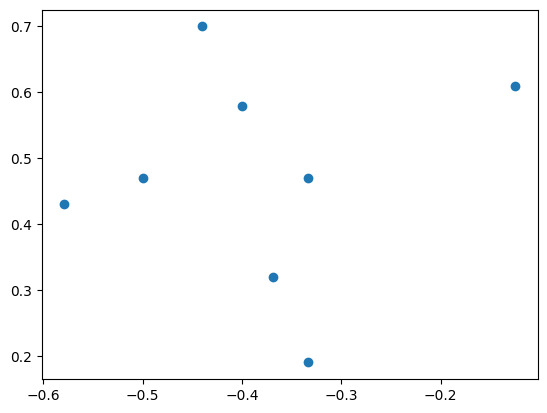

In [160]:
import matplotlib.pyplot as plt

x_points = [x[0] for x in sentiment_atlas_arr]
y_points = [x[1] for x in sentiment_atlas_arr]

plt.plot(x_points, y_points, 'o')
plt.show()